# Ein Unternehmer hat folgende Daten:

# 'Gewinn': [200, 100, 150], 'Mitarbeiter': [5, 3, 7], 'Maschinen': [10, 5, 6]


# Er möchte den Gewinn in Abhängigkeit der Mitarbeiter und Maschinen wissen.

# Weiter möchte er eine Vorhersage mit 'Mitarbeiter': [6], 'Maschinen': [8] durchführen
# Welche Regression können Sie Ihm empfehlen und welche Vorhersage



In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Erstelle einen DataFrame
data = {'Gewinn': [200, 100, 150], 'Mitarbeiter': [5, 3, 7], 'Maschinen': [10, 5, 6]}
df = pd.DataFrame(data)

# Zielvariable (y)
y = df['Gewinn']

# Feature-Variablen (X)
X = df[['Mitarbeiter', 'Maschinen']]

# Lineare Regression
model = LinearRegression()

# Trainiere das Modell
model.fit(X, y)

# Vorhersage für die Trainingsdaten
y_pred = model.predict(X)

# Neue Kombination von Mitarbeiter und Maschinen zur Schätzung
new_data = pd.DataFrame({'Mitarbeiter': [6], 'Maschinen': [8]})

# Vorhersage für die neue Kombination
new_prediction = model.predict(new_data)

# Ausgabe
print("Vorhersage für 6 Mitarbeiter und 8 Maschinen:", new_prediction)


Vorhersage für 6 Mitarbeiter und 8 Maschinen: [175.]


c:\Users\geise\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


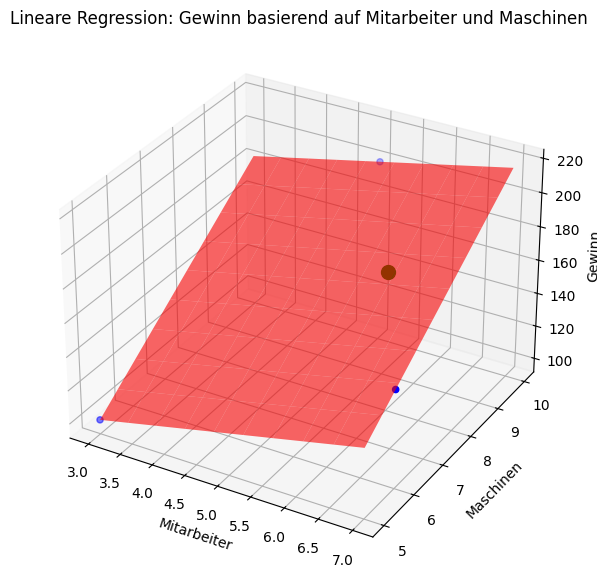

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 3D-Darstellung vorbereiten
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Datenpunkte für Mitarbeiter und Maschinen
Mitarbeiter = df['Mitarbeiter']
Maschinen = df['Maschinen']

# Zielvariable (Gewinn)
Gewinn = df['Gewinn']

# Scatterplot der Originaldaten
ax.scatter(Mitarbeiter, Maschinen, Gewinn, color='blue')

# Gitter für die Regressionsfläche erstellen
Mitarbeiter_range = np.linspace(Mitarbeiter.min(), Mitarbeiter.max(), 10)
Maschinen_range = np.linspace(Maschinen.min(), Maschinen.max(), 10)
Mitarbeiter_grid, Maschinen_grid = np.meshgrid(Mitarbeiter_range, Maschinen_range)

# Vorhersagen für das Gitter der Regressionsfläche
Gewinn_pred_grid = model.predict(np.c_[Mitarbeiter_grid.ravel(), Maschinen_grid.ravel()])
Gewinn_pred_grid = Gewinn_pred_grid.reshape(Mitarbeiter_grid.shape)

# Regressionsfläche plotten
ax.plot_surface(Mitarbeiter_grid, Maschinen_grid, Gewinn_pred_grid, color='red', alpha=0.6)

# Vorhersagepunkt markieren
ax.scatter(new_data['Mitarbeiter'], new_data['Maschinen'], new_prediction, color='green', s=100)

# Achsenbeschriftungen
ax.set_xlabel('Mitarbeiter')
ax.set_ylabel('Maschinen')
ax.set_zlabel('Gewinn')
ax.set_title('Lineare Regression: Gewinn basierend auf Mitarbeiter und Maschinen')

# Plot anzeigen
plt.show()
